---

# <center> ★ Machine Learning Project - Housing Price Prediction ★

---

<img src="songs.jpg" style="width: 400px;"/>

---

### Description:

Human's have greatly associated themselves with Songs & Music. It can improve mood, decrease pain and anxiety, and facilitate opportunities for emotional expression. Research suggests that music can benefit our physical and mental health in numerous ways. 

Lately a multiple studies have been carried out understand songs & it's popularity bases on certain factors. Such song samples are breaken down & their parameters are recorded to tabulated. Predicting the Song Popularity is the main aim.

The project is simple yet challenging, to predict the song popularity based on energy, acoustics, instumentalness, liveness, dancibility, etc. The dataset is large & it's complexity arises due to the fact that it has strong multicollinearity. Can you overcome these obstacles & build a decent predictive model?

**Source**
The dataset is taken from Kaggle:
https://www.kaggle.com/nicholasnisopoli/song-popularity-prediction/data


### Objective:
- Understand the Dataset & cleanup (if required).
- Build Regression models to predict the song popularity w.r.t a single & multiple feature.
- Also evaluate the models & compare thier respective scores like R2, RMSE, etc.

---

# <center>1. Data Exploration

In [1]:
#Importing the basic librarires

import math
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

from statsmodels.formula import api
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset

df = pd.read_csv('song_data.csv')

display(df.head())
df.drop(['song_name'], axis=1, inplace=True)

target = 'song_popularity'
features = [i for i in df.columns if i not in [target]]

original_df = df.copy(deep=True)

print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

song_name  song_popularity  song_duration_ms  \
0  Boulevard of Broken Dreams               73            262333   
1                  In The End               66            216933   
2           Seven Nation Army               76            231733   
3                  By The Way               74            216933   
4           How You Remind Me               56            223826   

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0      0.005520         0.496   0.682          0.000029    8    0.0589   
1      0.010300         0.542   0.853          0.000000    3    0.1080   
2      0.008170         0.737   0.463          0.447000    0    0.2550   
3      0.026400         0.451   0.970          0.003550    0    0.1020   
4      0.000954         0.447   0.766          0.000000   10    0.1130   

   loudness  audio_mode  speechiness    tempo  time_signature  audio_valence  
0    -4.095           1       0.0294  167.060               4          0.474  
1    -6.407           0       0.0498  105.256               4          0.370  
2    -7.828           1       0.0792  123.881               4          0.324  
3    -4.938           1       0.1070  122.444               4          0.198  
4    -5.065           1       0.0313  172.011               4          0.574


Inference: The Datset consists of 14 features & 18835 samples.


In [3]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_popularity   18835 non-null  int64  
 1   song_duration_ms  18835 non-null  int64  
 2   acousticness      18835 non-null  float64
 3   danceability      18835 non-null  float64
 4   energy            18835 non-null  float64
 5   instrumentalness  18835 non-null  float64
 6   key               18835 non-null  int64  
 7   liveness          18835 non-null  float64
 8   loudness          18835 non-null  float64
 9   audio_mode        18835 non-null  int64  
 10  speechiness       18835 non-null  float64
 11  tempo             18835 non-null  float64
 12  time_signature    18835 non-null  int64  
 13  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5)
memory usage: 2.0 MB


In [4]:
#Checking number of unique rows in each feature

df.nunique().sort_values()

audio_mode              2
time_signature          5
key                    12
song_popularity       101
danceability          849
energy               1132
speechiness          1224
audio_valence        1246
liveness             1425
acousticness         3209
instrumentalness     3925
loudness             8416
song_duration_ms    11771
tempo               12112
dtype: int64

In [5]:
#Checking number of unique rows in each feature

nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=15:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 10 numerical & 3 categorical features.


In [6]:
#Checking the stats of all the columns

display(df.describe())

song_popularity  song_duration_ms  acousticness  danceability  \
count     18835.000000      1.883500e+04  18835.000000  18835.000000   
mean         52.991877      2.182116e+05      0.258539      0.633348   
std          21.905654      5.988754e+04      0.288719      0.156723   
min           0.000000      1.200000e+04      0.000001      0.000000   
25%          40.000000      1.843395e+05      0.024100      0.533000   
50%          56.000000      2.113060e+05      0.132000      0.645000   
75%          69.000000      2.428440e+05      0.424000      0.748000   
max         100.000000      1.799346e+06      0.996000      0.987000   

             energy  instrumentalness           key      liveness  \
count  18835.000000      18835.000000  18835.000000  18835.000000   
mean       0.644995          0.078008      5.289196      0.179650   
std        0.214101          0.221591      3.614595      0.143984   
min        0.001070          0.000000      0.000000      0.010900   
25%        0.510000          0.000000      2.000000      0.092900   
50%        0.674000          0.000011      5.000000      0.122000   
75%        0.815000          0.002570      8.000000      0.221000   
max        0.999000          0.997000     11.000000      0.986000   

           loudness    audio_mode   speechiness         tempo  time_signature  \
count  18835.000000  18835.000000  18835.000000  18835.000000    18835.000000   
mean      -7.447435      0.628139      0.102099    121.073154        3.959119   
std        3.827831      0.483314      0.104378     28.714456        0.298533   
min      -38.768000      0.000000      0.000000      0.000000        0.000000   
25%       -9.044000      0.000000      0.037800     98.368000        4.000000   
50%       -6.555000      1.000000      0.055500    120.013000        4.000000   
75%       -4.908000      1.000000      0.119000    139.931000        4.000000   
max        1.585000      1.000000      0.941000    242.318000        5.000000   

       audio_valence  
count   18835.000000  
mean        0.527967  
std         0.244632  
min         0.000000  
25%         0.335000  
50%         0.527000  
75%         0.725000  
max         0.984000

**Inference:** The stats seem to be fine, let us do further analysis on the Dataset

---

# <center> 2. Exploratory Data Analysis (EDA)

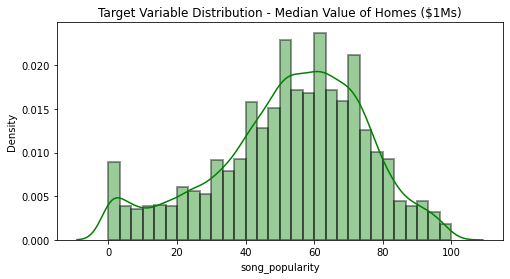

In [42]:
#Let us first analyze the distribution of the target variable

plt.figure(figsize=[8,4])
sns.distplot(df[target], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()

**Inference:**The Target Variable seems to be be normally distributed, averaging around $40000(units)

                               Visualising Categorical Features:                                


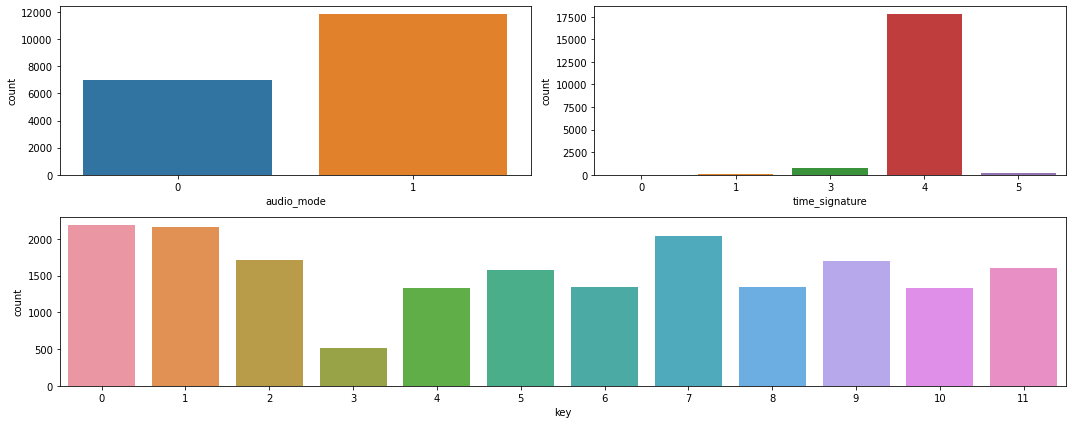

In [43]:
#Visualising the categorical features 

print('\033[1mVisualising Categorical Features:'.center(100))

n=2
plt.figure(figsize=[15,3*math.ceil(len(cf)/n)])

# for i in range(len(cf)):
#     if df[cf[i]].nunique()<=4:
#         plt.subplot(math.ceil(len(cf)/n),n,i+1)
#         sns.countplot(df[cf[i]])
#     else:
#         plt.subplot(math.ceil(len(cf)/2),2,i)
#         sns.countplot(df[cf[i]])

for i in range(len(cf)):
    if df[cf[i]].nunique()<=10:
        plt.subplot(math.ceil(len(cf)/n),n,i+1)
        sns.countplot(df[cf[i]])
    else:
        plt.subplot(2,1,i)
        sns.countplot(df[cf[i]])
        #plt.subplot(4,2,8)
        #sns.countplot(df[cf[i]])
        
plt.tight_layout()
plt.show()

**Inference:** The categorical features distribution can be seen in the above plots.

                                                Numeric Features Distribution                                                 


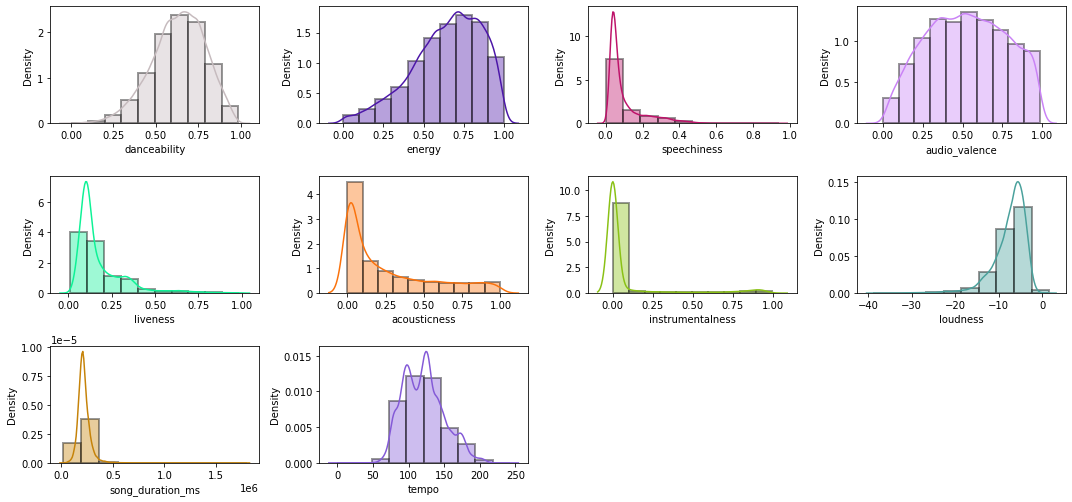

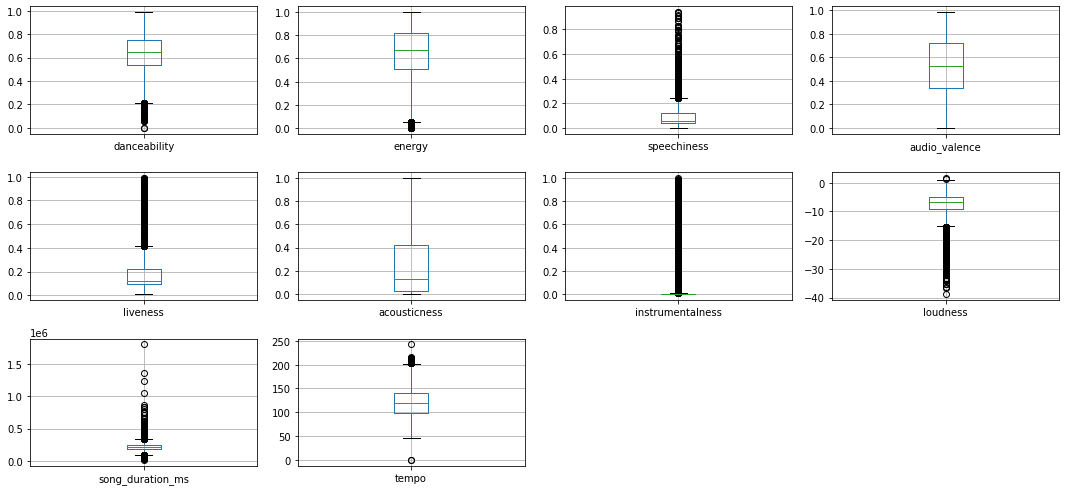

In [45]:
#Visualising the numeric features 

print('\033[1mNumeric Features Distribution'.center(130))

n=4

plt.figure(figsize=[15,3*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),4,i+1)
    sns.distplot(df[nf[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255,255,255])/255))
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,3*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),4,i+1)
    df.boxplot(nf[i])
plt.tight_layout()
plt.show()

**Inference:** There seem to be some outliers. let us fix these in the upcoming section...

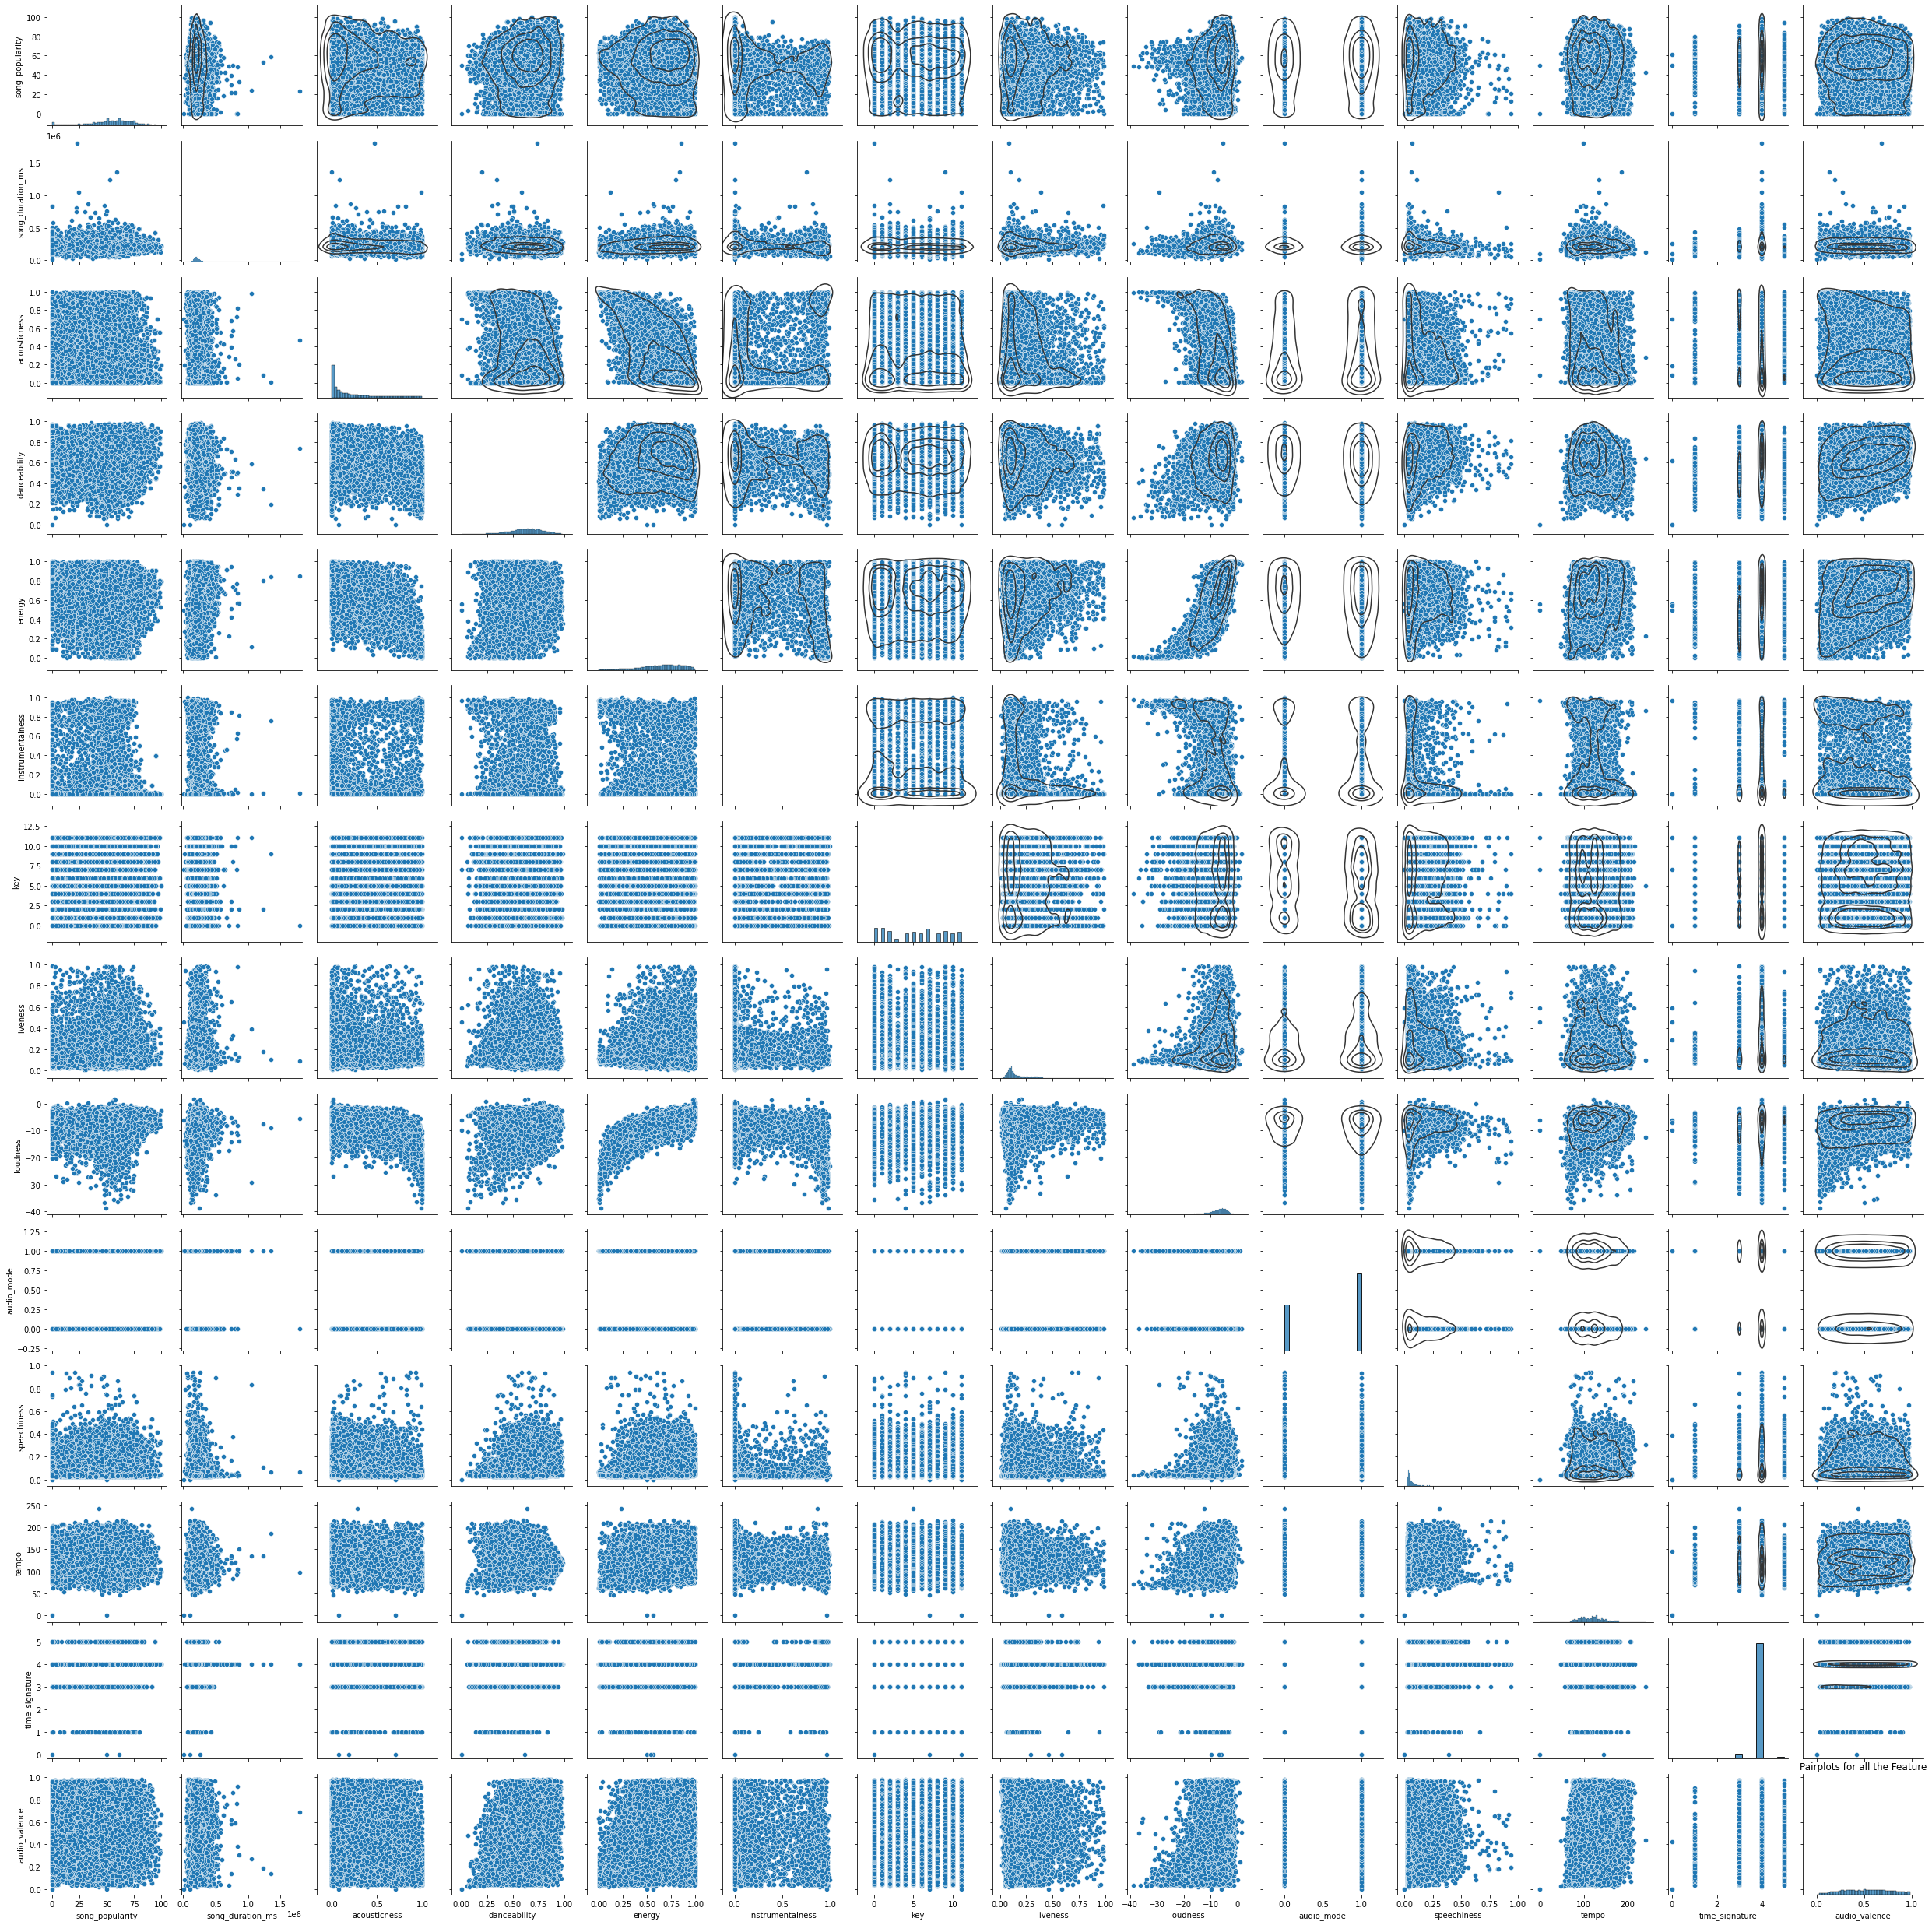

In [46]:
#Understanding the relationship between all the features

# g = sns.pairplot(df)
# plt.title('Pairplots for all the Feature')
# g.map_upper(sns.kdeplot, levels=4, color=".2")
# plt.show()

**Inference:** We can notice that some features have linear relationship, let us futher analyze the detect multicollinearity.

---

# <center> 3. Data Preprocessing

In [7]:
#Check for empty elements

print(df.isnull().sum())
print('\n\033[1mInference:\033[0m The dataset had {} inconsistant/null elements which were dropped.'.format(original_df.shape[0]-df.shape[0]))

song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

Inference: The dataset had 0 inconsistant/null elements which were dropped.


In [8]:
#Removal of any Duplicate rows (if any)

counter = 0
rs,cs = original_df.shape

df.drop_duplicates(inplace=True)

if df.shape==(rs,cs):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {rs-df.shape[0]}')


Inference: Number of duplicates dropped/fixed ---> 3911


In [9]:
#Removal of outlier:

df1 = df.copy()

#features1 = [i for i in features if i not in ['CHAS','RAD']]
features1 = nf

for i in features1:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
    df1 = df1.reset_index(drop=True)
display(df1.head())
print('\n\033[1mInference:\033[0m After removal of outliers, The dataset now has {} features & {} samples.'.format(df1.shape[1], df1.shape[0]))

song_popularity  song_duration_ms  acousticness  danceability  energy  \
0               73            262333      0.005520         0.496   0.682   
1               66            216933      0.010300         0.542   0.853   
2               74            216933      0.026400         0.451   0.970   
3               56            223826      0.000954         0.447   0.766   
4               80            235893      0.008950         0.316   0.945   

   instrumentalness  key  liveness  loudness  audio_mode  speechiness  \
0          0.000029    8    0.0589    -4.095           1       0.0294   
1          0.000000    3    0.1080    -6.407           0       0.0498   
2          0.003550    0    0.1020    -4.938           1       0.1070   
3          0.000000   10    0.1130    -5.065           1       0.0313   
4          0.000002    4    0.3960    -3.169           0       0.1240   

     tempo  time_signature  audio_valence  
0  167.060               4          0.474  
1  105.256               4          0.370  
2  122.444               4          0.198  
3  172.011               4          0.574  
4  189.931               4          0.320


Inference: After removal of outliers, The dataset now has 14 features & 8950 samples.


In [10]:
#Converting categorical Columns to Numeric

df3 = df1.copy()

#One-Hot Binay Encoding
oh=True
dm=True
for i in cf:
    #print(i)
    if df3[i].nunique()==2:
        if oh==True: print("\033[1mOne-Hot Encoding on features:\033[0m")
        print(i);oh=False
        df3[i]=pd.get_dummies(df3[i], drop_first=True, prefix=str(i))
    if (df3[i].nunique()>2 and df3[i].nunique()<15):
        if dm==True: print("\n\033[1mDummy Encoding on features:\033[0m")
        print(i);dm=False
        df3 = pd.concat([df3.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df3[i], drop_first=True, prefix=str(i)))],axis=1)
    

One-Hot Encoding on features:
audio_mode

Dummy Encoding on features:
time_signature
key


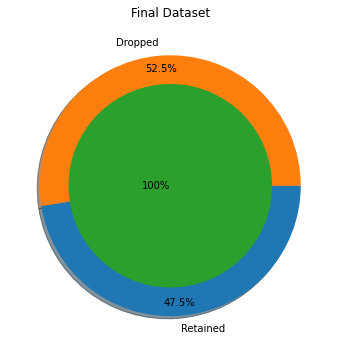


Inference: After the cleanup process, 9885 samples were dropped, while retaining 52.48% of the data.


In [11]:
#Final Dataset size after performing Preprocessing

df = df3.copy()
df.columns=[i.replace('-','_') for i in df.columns]

plt.title('Final Dataset')
plt.pie([df.shape[0], original_df.shape[0]-df.shape[0]], radius = 1, labels=['Retained','Dropped'], counterclock=False, 
        autopct='%1.1f%%', pctdistance=0.9, explode=[0,0], shadow=True)
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78)
plt.show()

print(f'\n\033[1mInference:\033[0m After the cleanup process, {original_df.shape[0]-df.shape[0]} samples were dropped, \
while retaining {round(100 - (df.shape[0]*100/(original_df.shape[0])),2)}% of the data.')

---

# <center> 4. Data Manipulation

In [12]:
#Splitting the data intro training & testing sets

X = df.drop([target],axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)
Train_X.reset_index(drop=True,inplace=True)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (8950, 25) (8950,) 
Training set  --->  (7160, 25) (7160,) 
Testing set   --->  (1790, 25)  (1790,)


In [13]:
#Feature Scaling (Standardization)

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(120))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(120))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                                         Standardardization on Training set                                         


song_duration_ms  acousticness  danceability        energy  \
count      7.160000e+03  7.160000e+03  7.160000e+03  7.160000e+03   
mean      -2.143537e-16 -9.551639e-17 -4.381349e-16 -1.359558e-16   
std        1.000070e+00  1.000070e+00  1.000070e+00  1.000070e+00   
min       -2.625387e+00 -9.181177e-01 -2.918774e+00 -3.131156e+00   
25%       -6.702830e-01 -8.223387e-01 -6.452384e-01 -6.864460e-01   
50%       -6.177447e-02 -4.150227e-01  5.798743e-02  1.271097e-01   
75%        6.146981e-01  5.921024e-01  7.219555e-01  8.042306e-01   
max        2.716562e+00  2.672887e+00  2.386143e+00  1.703690e+00   

       instrumentalness      liveness      loudness    audio_mode  \
count      7.160000e+03  7.160000e+03  7.160000e+03  7.160000e+03   
mean      -2.480945e-18 -8.782546e-17 -9.824543e-17  1.984756e-17   
std        1.000070e+00  1.000070e+00  1.000070e+00  1.000070e+00   
min       -3.425841e-01 -1.575563e+00 -2.825473e+00 -1.348254e+00   
25%       -3.425841e-01 -6.881147e-01 -5.876500e-01 -1.348254e+00   
50%       -3.411082e-01 -3.751120e-01  1.864114e-01  7.417001e-01   
75%       -2.673929e-01  4.767485e-01  7.447833e-01  7.417001e-01   
max        6.650948e+00  2.864200e+00  2.376364e+00  7.417001e-01   

        speechiness         tempo  ...         key_2         key_3  \
count  7.160000e+03  7.160000e+03  ...  7.160000e+03  7.160000e+03   
mean   1.081692e-16 -1.429024e-16  ... -5.656555e-17 -1.587805e-17   
std    1.000070e+00  1.000070e+00  ...  1.000070e+00  1.000070e+00   
min   -9.812680e-01 -2.528553e+00  ... -3.215677e-01 -1.695159e-01   
25%   -6.975836e-01 -7.615380e-01  ... -3.215677e-01 -1.695159e-01   
50%   -4.002151e-01 -1.426259e-02  ... -3.215677e-01 -1.695159e-01   
75%    2.966273e-01  6.418977e-01  ... -3.215677e-01 -1.695159e-01   
max    3.368207e+00  2.773299e+00  ...  3.109765e+00  5.899152e+00   

              key_4         key_5         key_6         key_7         key_8  \
count  7.160000e+03  7.160000e+03  7.160000e+03  7.160000e+03  7.160000e+03   
mean  -9.824543e-17 -2.927515e-17 -1.389329e-17  7.591693e-17  4.465702e-17   
std    1.000070e+00  1.000070e+00  1.000070e+00  1.000070e+00  1.000070e+00   
min   -2.772249e-01 -3.073541e-01 -2.801351e-01 -3.603778e-01 -2.824479e-01   
25%   -2.772249e-01 -3.073541e-01 -2.801351e-01 -3.603778e-01 -2.824479e-01   
50%   -2.772249e-01 -3.073541e-01 -2.801351e-01 -3.603778e-01 -2.824479e-01   
75%   -2.772249e-01 -3.073541e-01 -2.801351e-01 -3.603778e-01 -2.824479e-01   
max    3.607179e+00  3.253577e+00  3.569706e+00  2.774865e+00  3.540476e+00   

              key_9        key_10        key_11  
count  7.160000e+03  7.160000e+03  7.160000e+03  
mean   5.185176e-17 -7.939025e-17 -2.431326e-17  
std    1.000070e+00  1.000070e+00  1.000070e+00  
min   -3.239418e-01 -2.671612e-01 -2.974504e-01  
25%   -3.239418e-01 -2.671612e-01 -2.974504e-01  
50%   -3.239418e-01 -2.671612e-01 -2.974504e-01  
75%   -3.239418e-01 -2.671612e-01 -2.974504e-01  
max    3.086975e+00  3.743058e+00  3.361905e+00  

[8 rows x 25 columns]


                                          Standardardization on Testing set                                          


song_duration_ms  acousticness  danceability       energy  \
count       1790.000000   1790.000000   1790.000000  1790.000000   
mean           0.036125     -0.014032      0.006938     0.028758   
std            0.971755      0.975985      0.990170     0.974326   
min           -2.491247     -0.918115     -2.932429    -2.934083   
25%           -0.613785     -0.815321     -0.624756    -0.610649   
50%           -0.024516     -0.425960      0.064815     0.149849   
75%            0.611647      0.586634      0.733904     0.809284   
max            2.685640      2.669241      2.345178     1.693583   

       instrumentalness     liveness     loudness   audio_mode  speechiness  \
count       1790.000000  1790.000000  1790.000000  1790.000000  1790.000000   
mean           0.010602    -0.058353     0.026948     0.009632    -0.023773   
std            1.002490     0.982153     0.979911     0.997307     0.968979   
min           -0.342584    -1.543058    -2.781757    -1.348254    -0.972847   
25%           -0.342584    -0.734631    -0.562450    -1.348254    -0.703373   
50%           -0.341076    -0.425551     0.223624     0.741700    -0.412847   
75%           -0.262995     0.373068     0.727351     0.741700     0.323469   
max            6.608043     2.852991     2.786427     0.741700     3.368207   

             tempo  ...        key_2        key_3        key_4        key_5  \
count  1790.000000  ...  1790.000000  1790.000000  1790.000000  1790.000000   
mean     -0.005688  ...    -0.012939     0.006781    -0.001628     0.024867   
std       1.002542  ...     0.981985     1.019502     0.997564     1.035975   
min      -2.236695  ...    -0.321568    -0.169516    -0.277225    -0.307354   
25%      -0.755222  ...    -0.321568    -0.169516    -0.277225    -0.307354   
50%      -0.021330  ...    -0.321568    -0.169516    -0.277225    -0.307354   
75%       0.580851  ...    -0.321568    -0.169516    -0.277225    -0.307354   
max       2.675691  ...     3.109765     5.899152     3.607179     3.253577   

             key_6        key_7        key_8        key_9       key_10  \
count  1790.000000  1790.000000  1790.000000  1790.000000  1790.000000   
mean     -0.058608    -0.015326     0.025095     0.036205    -0.022964   
std       0.896783     0.981478     1.040064     1.048494     0.959254   
min      -0.280135    -0.360378    -0.282448    -0.323942    -0.267161   
25%      -0.280135    -0.360378    -0.282448    -0.323942    -0.267161   
50%      -0.280135    -0.360378    -0.282448    -0.323942    -0.267161   
75%      -0.280135    -0.360378    -0.282448    -0.323942    -0.267161   
max       3.569706     2.774865     3.540476     3.086975     3.743058   

            key_11  
count  1790.000000  
mean     -0.003066  
std       0.995564  
min      -0.297450  
25%      -0.297450  
50%      -0.297450  
75%      -0.297450  
max       3.361905  

[8 rows x 25 columns]

---

# <center> 5. Feature Selection/Extraction

                             Correlation Matrix                             


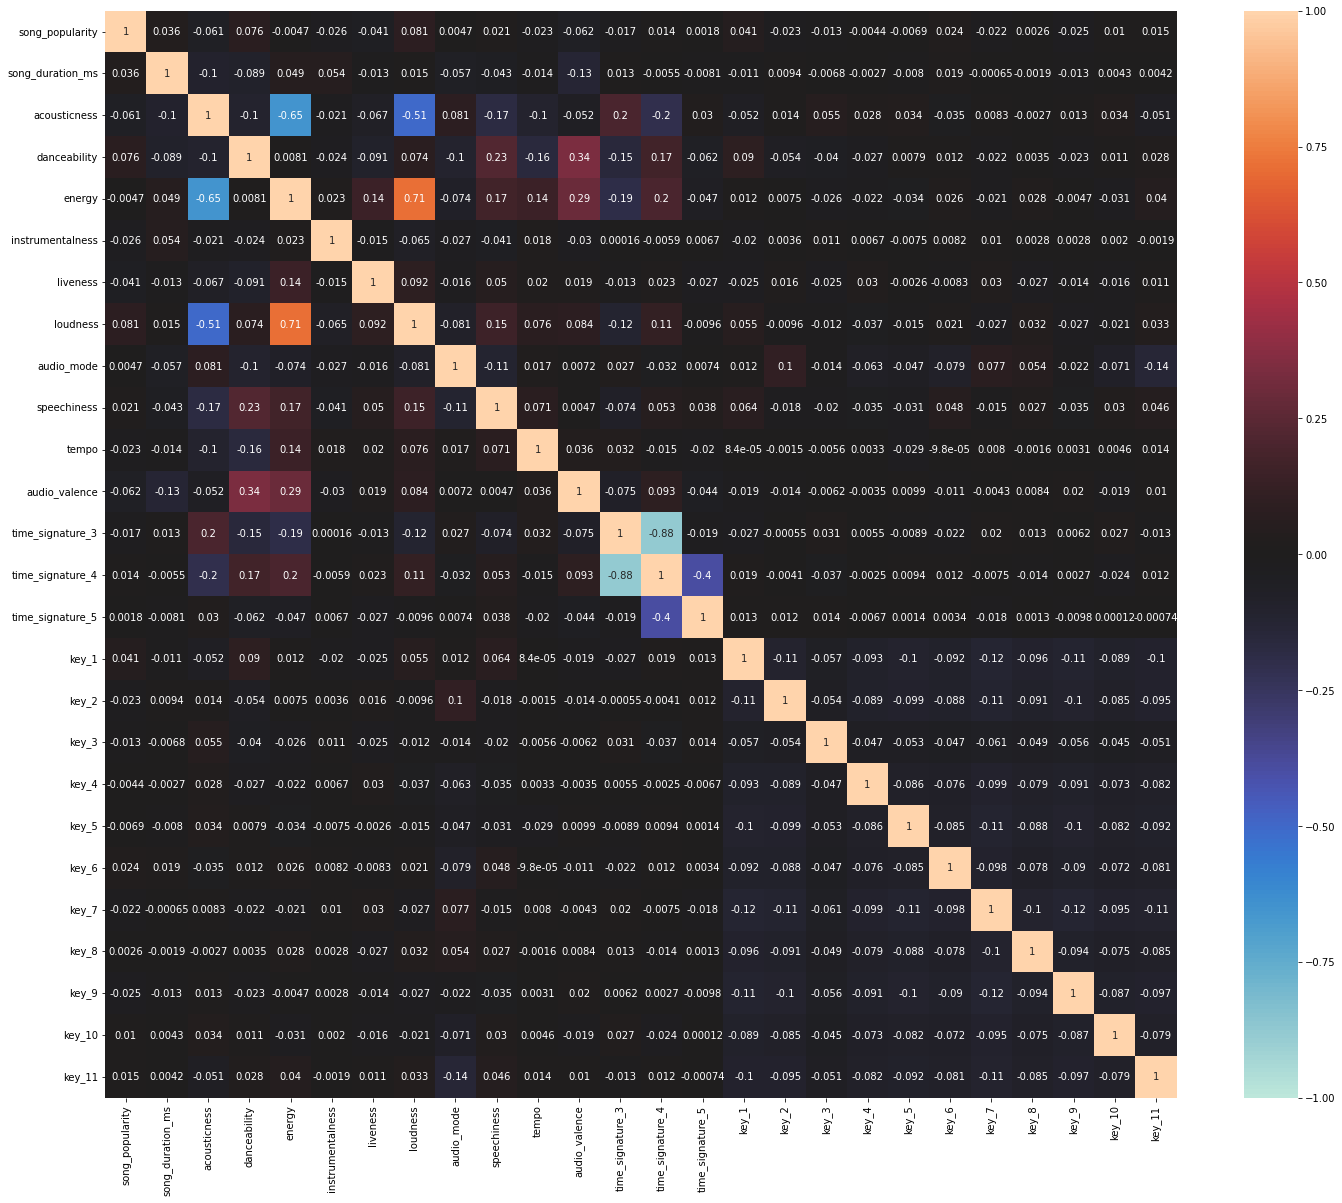

In [15]:
#Checking the correlation

print('\033[1mCorrelation Matrix'.center(80))
plt.figure(figsize=[24,20])
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0) #cmap='BuGn'
plt.show()

**Inference:** There seems to be strong multi-correlation between the features. Let us try to fix these...

In [16]:
#Testing a Linear Regression model with statsmodels

Train_xy = pd.concat([Train_X_std,Train_Y.reset_index(drop=True)],axis=1)
a = Train_xy.columns.values

API = api.ols(formula='{} ~ {}'.format(target,' + '.join(i for i in Train_X.columns)), data=Train_xy).fit()
#print(API.conf_int())
#print(API.pvalues)
API.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        song_popularity   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     11.02
Date:                Fri, 10 Dec 2021   Prob (F-statistic):           4.09e-43
Time:                        20:42:53   Log-Likelihood:                -31711.
No. Observations:                7160   AIC:                         6.347e+04
Df Residuals:                    7134   BIC:                         6.365e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           50.2975      0.240    209.404      0.000      49.827      50.768
song_duration_ms     0.6780      0.246      2.760      0.006       0.196       1.160
acousticness        -1.6038      0.336     -4.771      0.000      -2.263      -0.945
danceability         1.7539      0.288      6.092      0.000       1.190       2.318
energy              -2.5832      0.450     -5.744      0.000      -3.465      -1.702
instrumentalness    -0.3207      0.243     -1.319      0.187      -0.797       0.156
liveness            -0.6221      0.245     -2.535      0.011      -1.103      -0.141
loudness             2.8740      0.358      8.038      0.000       2.173       3.575
audio_mode           0.4419      0.253      1.748      0.081      -0.054       0.938
speechiness         -0.3549      0.258     -1.374      0.170      -0.861       0.151
tempo               -0.1327      0.248     -0.534      0.593      -0.619       0.354
audio_valence       -1.4757      0.290     -5.086      0.000      -2.044      -0.907
time_signature_3    -0.2931      0.906     -0.323      0.746      -2.070       1.484
time_signature_4    -0.0780      0.997     -0.078      0.938      -2.033       1.877
time_signature_5    -0.0273      0.488     -0.056      0.955      -0.985       0.930
key_1                0.4666      0.314      1.487      0.137      -0.148       1.082
key_2               -0.5856      0.308     -1.902      0.057      -1.189       0.018
key_3               -0.1645      0.265     -0.620      0.535      -0.685       0.356
key_4                0.1626      0.297      0.547      0.585      -0.421       0.746
key_5               -0.1874      0.306     -0.612      0.540      -0.787       0.413
key_6                0.2331      0.299      0.781      0.435      -0.352       0.818
key_7               -0.5738      0.319     -1.796      0.073      -1.200       0.053
key_8               -0.1306      0.297     -0.440      0.660      -0.713       0.451
key_9               -0.4823      0.310     -1.554      0.120      -1.091       0.126
key_10               0.2570      0.295      0.871      0.384      -0.321       0.835
key_11               0.3306      0.306      1.080      0.280      -0.269       0.930
==============================================================================
Omnibus:                      437.955   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              522.571
Skew:                          -0.661   Prob(JB):                    3.35e-114
Kurtosis:                       2.946   Cond. No.                         9.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 ---

**Inference:** 
We can fix these multicollinearity with two techniques:
1. Manual Method - Variance Inflation Factor (VIF)
2. Automatic Method - Recursive Feature Elimination (RFE)
3. Feature Elmination using PCA Decomposition

## 5a. Manual Method - VIF

Dropped Features -->  ['time_signature_4', 'energy', 'key_7', 'acousticness', 'danceability', 'key_1', 'key_11', 'key_9']


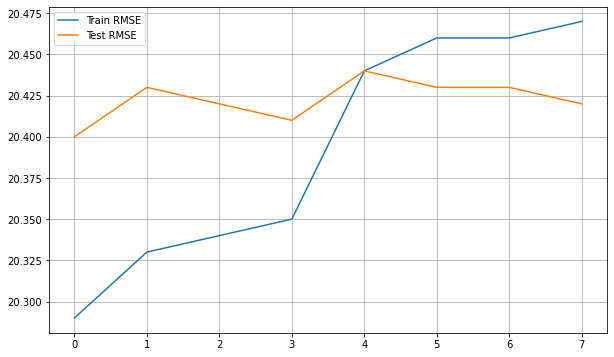

In [169]:
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
#Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
#Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)

DROP=[];b=[]

for i in range(len(Train_X_std.columns)-1):
    vif = pd.DataFrame()
    X = Train_X_std.drop(DROP,axis=1)
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif.reset_index(drop=True, inplace=True)
    if vif.loc[0][1]>=1.1:
        DROP.append(vif.loc[0][0])
        LR = LinearRegression()
        LR.fit(Train_X_std.drop(DROP,axis=1), Train_Y)

        pred1 = LR.predict(Train_X_std.drop(DROP,axis=1))
        pred2 = LR.predict(Test_X_std.drop(DROP,axis=1))
        
        Trr.append(round(np.sqrt(mean_squared_error(Train_Y, pred1)),2))
        Tss.append(round(np.sqrt(mean_squared_error(Test_Y, pred2)),2))

        #Trd.loc[i,'ord-'+str(k)] = round(np.sqrt(mean_squared_error(Train_Y, pred1)),2)
        #Tsd.loc[i,'ord-'+str(k)] = round(np.sqrt(mean_squared_error(Test_Y, pred2)),2)
        
print('Dropped Features --> ',DROP)
#plt.plot(b)
#plt.show()
#print(API.summary())

# plt.figure(figsize=[20,4])
# plt.subplot(1,3,1)
# sns.heatmap(Trd.loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max())
# plt.title('Train RMSE')
# plt.subplot(1,3,2)
# sns.heatmap(Tsd.loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max()+10)
# plt.title('Test RMSE')
# plt.subplot(1,3,3)
# sns.heatmap((Trd+Tsd).loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max()+25)
# plt.title('Total RMSE')
# plt.show()

plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
#plt.ylim([19.75,20.75])
plt.legend()
plt.grid()
plt.show()

## 5b. Automatic Method - RFE

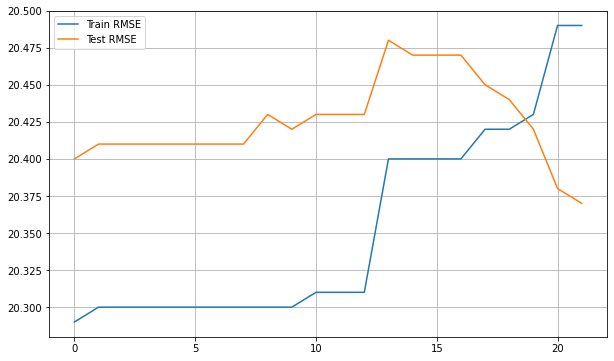

In [170]:
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)

m=df.shape[1]-4
for i in range(m):
    lm = LinearRegression()
    lm.fit(Train_X_std, Train_Y)

    rfe = RFE(lm,n_features_to_select=Train_X_std.shape[1]-i)             # running RFE
    rfe = rfe.fit(Train_X, Train_Y)

    Train_xy = pd.concat([Train_X_std[Train_X.columns[rfe.support_]],Train_Y.reset_index(drop=True)],axis=1)
    a = Train_xy.columns.values.tolist()
    a.remove(target)

    API = api.ols(formula='{} ~ {}'.format(target,' + '.join(i for i in a)), data=Train_xy).fit()
    DROP.append(vif.loc[0][0])
    LR = LinearRegression()
    LR.fit(Train_X_std.loc[:,rfe.support_], Train_Y)

    pred1 = LR.predict(Train_X_std.loc[:,rfe.support_])
    pred2 = LR.predict(Test_X_std.loc[:,rfe.support_])

    Trr.append(round(np.sqrt(mean_squared_error(Train_Y, pred1)),2))
    Tss.append(round(np.sqrt(mean_squared_error(Test_Y, pred2)),2))
        
# plt.figure(figsize=[20,4])
# plt.subplot(1,3,1)
# sns.heatmap(Trd.loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max())
# plt.title('Train RMSE')
# plt.subplot(1,3,2)
# sns.heatmap(Tsd.loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max()+10)
# plt.title('Test RMSE')
# plt.subplot(1,3,3)
# sns.heatmap((Trd+Tsd).loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max()+25)
# plt.title('Total RMSE')
# plt.show()

plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
#plt.ylim([19.75,20.75])
plt.legend()
plt.grid()
plt.show()

## 5c. Feature Elmination using PCA Decomposition

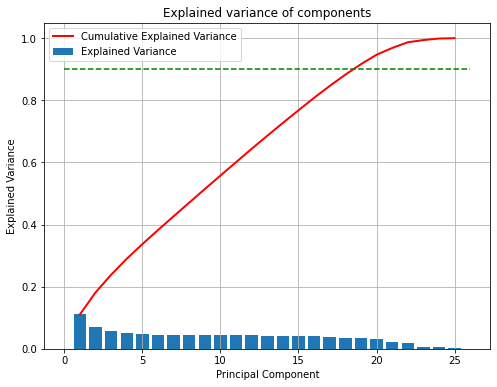

In [171]:
from sklearn.decomposition import PCA

pca = PCA().fit(Train_X_std)

fig, ax = plt.subplots(figsize=(8,6))
x_values = range(1, pca.n_components_+1)
ax.bar(x_values, pca.explained_variance_ratio_, lw=2, label='Explained Variance')
ax.plot(x_values, np.cumsum(pca.explained_variance_ratio_), lw=2, label='Cumulative Explained Variance', color='red')
plt.plot([0,pca.n_components_+1],[0.9,0.9],'g--')
ax.set_title('Explained variance of components')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
plt.legend()
plt.grid()
plt.show()

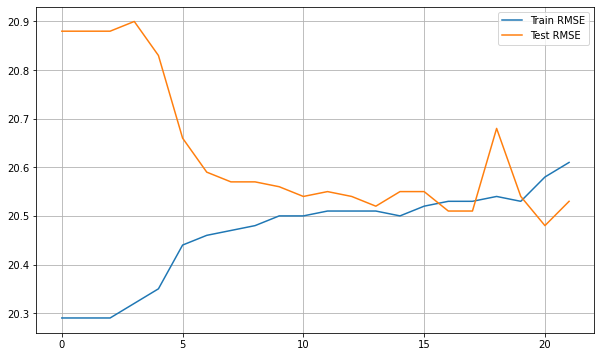

In [172]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
m=df.shape[1]-4

for i in range(m):
    pca = PCA(n_components=Train_X_std.shape[1]-i)
    Train_X_std_pca = pca.fit_transform(Train_X_std)
    Test_X_std_pca = pca.fit_transform(Test_X_std)
    
    LR = LinearRegression()
    LR.fit(Train_X_std_pca, Train_Y)

    pred1 = LR.predict(Train_X_std_pca)
    pred2 = LR.predict(Test_X_std_pca)

    Trr.append(round(np.sqrt(mean_squared_error(Train_Y, pred1)),2))
    Tss.append(round(np.sqrt(mean_squared_error(Test_Y, pred2)),2))

# plt.figure(figsize=[20,4.5])
# plt.subplot(1,3,1)
# sns.heatmap(Trd.loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max())
# plt.title('Train RMSE')
# plt.subplot(1,3,2)
# sns.heatmap(Tsd.loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max()+10)
# plt.title('Test RMSE')
# plt.subplot(1,3,3)
# sns.heatmap((Trd+Tsd).loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max()+25)
# plt.title('Total RMSE')
# plt.show()

plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
#plt.ylim([19.5,20.75])
plt.legend()
plt.grid()
plt.show()

### Conclusion:
It can be seen that the performance of the modelsis quiet comparable unpon dropping features using VIF, RFE & PCA Techniques. Comparing the RMSE plots, the optimal values were found for dropping few features using automated RFE Technique, but we shall not perform any of these, & let the algorithms take care of it.

---

# <center> 6. Predictive Modelling

In [14]:
#Let us first define a function to evaluate our models

Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros([5,8]), columns=['Train-R2','Test-R2','Train-RSS','Test-RSS',
                                                                            'Train-MSE','Test-MSE','Train-RMSE','Test-RMSE'])
rc=np.random.choice(nf,3)
def Evaluate(n, pred1,pred2):
    #Plotting predicted predicteds alongside the actual datapoints 
    plt.figure(figsize=[15,6])
    for e,i in enumerate(rc):
        plt.subplot(2,3,e+1)
        plt.scatter(y=Train_Y, x=Train_X_std[i], label='Actual')
        plt.scatter(y=pred1, x=Train_X_std[i], label='Prediction')
        plt.legend()
    plt.show()

    #Evaluating the Multiple Linear Regression Model

    print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Training set --->',round(r2_score(Train_Y, pred1),2))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Train_Y-pred1)),2))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Train_Y, pred1),2))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Train_Y, pred1)),2))

    print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Testing set --->',round(r2_score(Test_Y, pred2),2))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Test_Y-pred2)),2))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Test_Y, pred2),2))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Test_Y, pred2)),2))
    print('\n{}Residual Plots{}'.format('-'*20, '-'*20))
    
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-R2']  = round(r2_score(Train_Y, pred1),2)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-R2']   = round(r2_score(Test_Y, pred2),2)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RSS'] = round(np.sum(np.square(Train_Y-pred1)),2)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RSS']  = round(np.sum(np.square(Test_Y-pred2)),2)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-MSE'] = round(mean_squared_error(Train_Y, pred1),2)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-MSE']  = round(mean_squared_error(Test_Y, pred2),2)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RMSE']= round(np.sqrt(mean_squared_error(Train_Y, pred1)),2)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RMSE'] = round(np.sqrt(mean_squared_error(Test_Y, pred2)),2)

    # Plotting y_test and y_pred to understand the spread.
    plt.figure(figsize=[15,4])

    plt.subplot(1,2,1)
    sns.distplot((Train_Y - pred1))
    plt.title('Error Terms')          
    plt.xlabel('Errors') 

    plt.subplot(1,2,2)
    plt.scatter(Train_Y,pred1)
    plt.plot([Train_Y.min(),Train_Y.max()],[Train_Y.min(),Train_Y.max()], 'r--')
    plt.title('Test vs Prediction')         
    plt.xlabel('y_test')                       
    plt.ylabel('y_pred')                       
    plt.show()

---

**Objective:** Let us now try building multiple regression models & compare their evaluation metrics to choose the best fit model both training and testing sets...

## 6a. Multiple Linear Regression(MLR)

<img src="mr.png" style="width: 600px;float: left;"/>

<<<----------------------------------- Evaluating Multiple Linear Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 0.67799049 -1.60380626  1.75393138 -2.5832131  -0.32071231 -0.62212255
  2.87396529  0.44191383 -0.35490245 -0.13267213 -1.47566193 -0.29314479
 -0.07804226 -0.02727285  0.46659632 -0.58557066 -0.16445478  0.16261428
 -0.18742336  0.23306068 -0.57376241 -0.13064628 -0.48226354  0.25695573
  0.33055837]
The Intercept of the Regresion Model was found to be  50.297486033519554


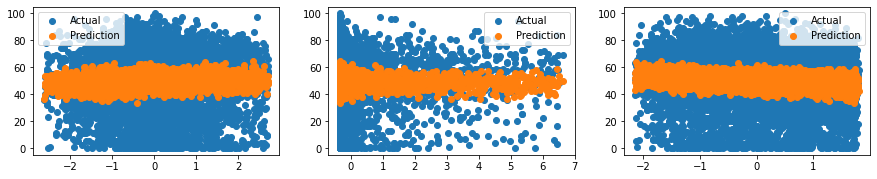



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.04
Residual Sum of Squares (RSS) on Training set  ---> 2946919.97
Mean Squared Error (MSE) on Training set       ---> 411.58
Root Mean Squared Error (RMSE) on Training set ---> 20.29

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.0
Residual Sum of Squares (RSS) on Training set  ---> 745117.98
Mean Squared Error (MSE) on Training set       ---> 416.27
Root Mean Squared Error (RMSE) on Training set ---> 20.4

--------------------Residual Plots--------------------


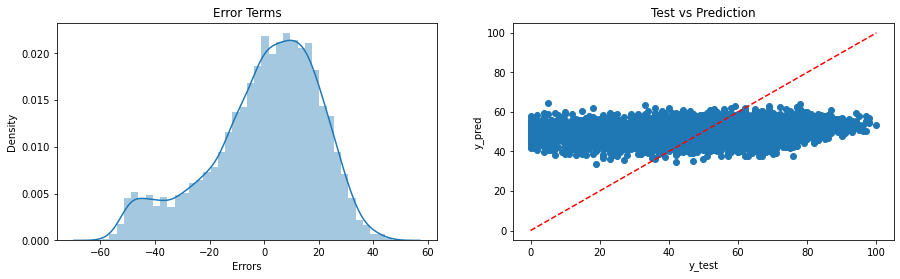

In [15]:
#Linear Regression

MLR = LinearRegression().fit(Train_X_std,Train_Y)
pred1 = MLR.predict(Train_X_std)
pred2 = MLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Multiple Linear Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(0, pred1, pred2)

---

## 6b. Ridge Regression Model

<img src="ridge.png" style="width: 500px;float: left;"/>

<<<----------------------------------- Evaluating Ridge Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 0.67799049 -1.60380626  1.75393138 -2.5832131  -0.32071231 -0.62212255
  2.87396529  0.44191383 -0.35490245 -0.13267213 -1.47566193 -0.29314479
 -0.07804226 -0.02727285  0.46659632 -0.58557066 -0.16445478  0.16261428
 -0.18742336  0.23306068 -0.57376241 -0.13064628 -0.48226354  0.25695573
  0.33055837]
The Intercept of the Regresion Model was found to be  50.297486033519554


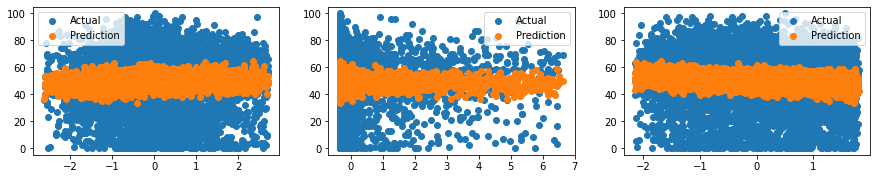



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.04
Residual Sum of Squares (RSS) on Training set  ---> 2946919.98
Mean Squared Error (MSE) on Training set       ---> 411.58
Root Mean Squared Error (RMSE) on Training set ---> 20.29

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.0
Residual Sum of Squares (RSS) on Training set  ---> 745114.06
Mean Squared Error (MSE) on Training set       ---> 416.26
Root Mean Squared Error (RMSE) on Training set ---> 20.4

--------------------Residual Plots--------------------


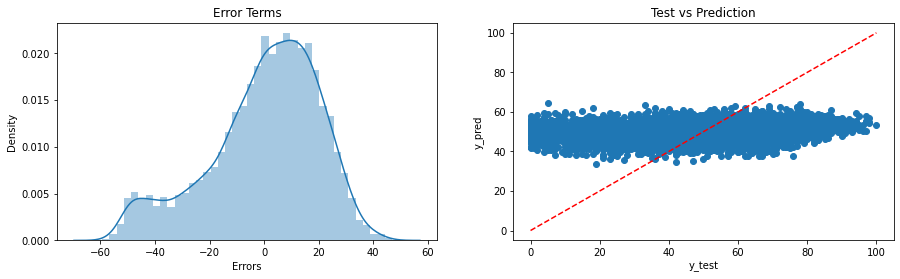

In [39]:
#Creating a Ridge Regression model

RLR = Ridge().fit(Train_X_std,Train_Y)
pred1 = RLR.predict(Train_X_std)
pred2 = RLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Ridge Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(1, pred1, pred2)

---

## 6c. Lasso Regression Model

<img src="lasso.png" style="width: 500px;float: left;"/>

<<<----------------------------------- Evaluating Lasso Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 0.67799049 -1.60380626  1.75393138 -2.5832131  -0.32071231 -0.62212255
  2.87396529  0.44191383 -0.35490245 -0.13267213 -1.47566193 -0.29314479
 -0.07804226 -0.02727285  0.46659632 -0.58557066 -0.16445478  0.16261428
 -0.18742336  0.23306068 -0.57376241 -0.13064628 -0.48226354  0.25695573
  0.33055837]
The Intercept of the Regresion Model was found to be  50.297486033519554


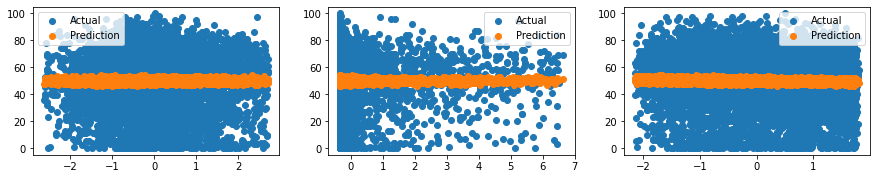



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.02
Residual Sum of Squares (RSS) on Training set  ---> 3014406.15
Mean Squared Error (MSE) on Training set       ---> 421.01
Root Mean Squared Error (RMSE) on Training set ---> 20.52

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.01
Residual Sum of Squares (RSS) on Training set  ---> 742350.23
Mean Squared Error (MSE) on Training set       ---> 414.72
Root Mean Squared Error (RMSE) on Training set ---> 20.36

--------------------Residual Plots--------------------


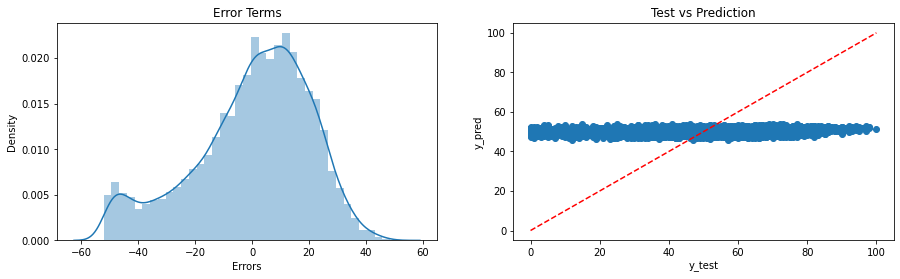

In [40]:
#Creating a Ridge Regression model

LLR = Lasso().fit(Train_X_std,Train_Y)
pred1 = LLR.predict(Train_X_std)
pred2 = LLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Lasso Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(2, pred1, pred2)

---

## 6d. Elastic-Net Regression

<img src="en.png" style="width: 500px;float: left;"/>

<<<----------------------------------- Evaluating Elastic-Net Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 0.67799049 -1.60380626  1.75393138 -2.5832131  -0.32071231 -0.62212255
  2.87396529  0.44191383 -0.35490245 -0.13267213 -1.47566193 -0.29314479
 -0.07804226 -0.02727285  0.46659632 -0.58557066 -0.16445478  0.16261428
 -0.18742336  0.23306068 -0.57376241 -0.13064628 -0.48226354  0.25695573
  0.33055837]
The Intercept of the Regresion Model was found to be  50.297486033519554


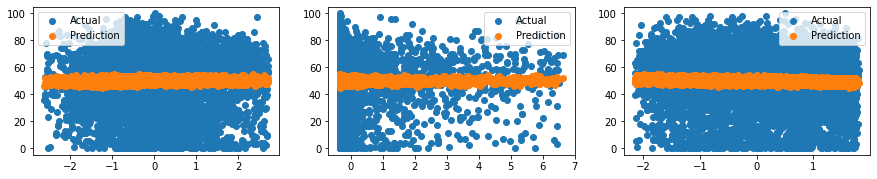



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.02
Residual Sum of Squares (RSS) on Training set  ---> 3001964.44
Mean Squared Error (MSE) on Training set       ---> 419.27
Root Mean Squared Error (RMSE) on Training set ---> 20.48

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.01
Residual Sum of Squares (RSS) on Training set  ---> 741970.93
Mean Squared Error (MSE) on Training set       ---> 414.51
Root Mean Squared Error (RMSE) on Training set ---> 20.36

--------------------Residual Plots--------------------


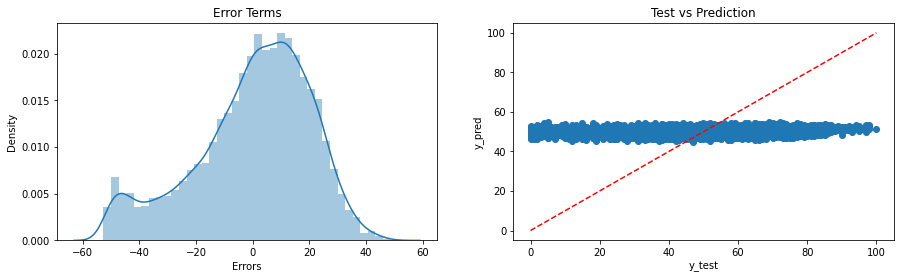

In [41]:
#Creating a ElasticNet Regression model

ENR = ElasticNet().fit(Train_X_std,Train_Y)
pred1 = ENR.predict(Train_X_std)
pred2 = ENR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Elastic-Net Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(3, pred1, pred2)

---

## 6e. Polynomial Regression Model

<img src="pn.png" style="width: 500px;float: left;"/>

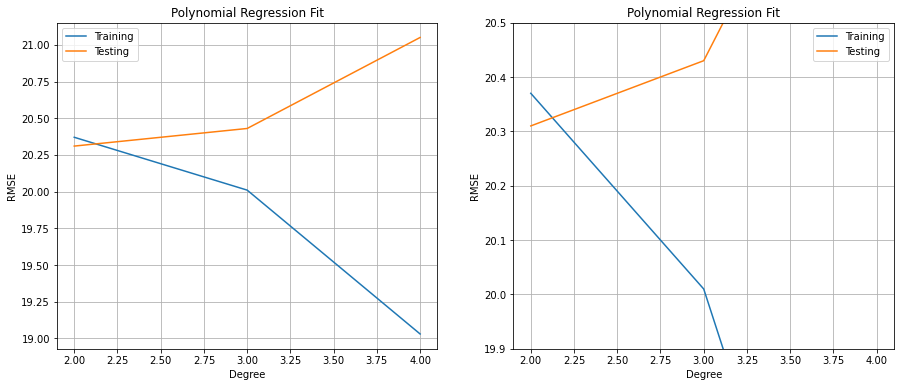

In [29]:
#Checking polynomial regression performance on various degrees

Trr=[]; Tss=[]
n_degree=5

for i in range(2,n_degree):
    #print(f'{i} Degree')
    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(Train_X_std)
    X_poly1 = poly_reg.fit_transform(Test_X_std)
    LR = ElasticNet()
    LR.fit(X_poly, Train_Y)
    
    pred1 = LR.predict(X_poly)
    Trr.append(round(np.sqrt(mean_squared_error(Train_Y, pred1)),2))
    
    pred2 = LR.predict(X_poly1)
    Tss.append(round(np.sqrt(mean_squared_error(Test_Y, pred2)),2))

plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.plot(range(2,n_degree),Trr, label='Training')
plt.plot(range(2,n_degree),Tss, label='Testing')
#plt.plot([1,4],[1,4],'b--')
plt.title('Polynomial Regression Fit')
#plt.ylim([0,5])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
#plt.xticks()

plt.subplot(1,2,2)
plt.plot(range(2,n_degree),Trr, label='Training')
plt.plot(range(2,n_degree),Tss, label='Testing')
plt.title('Polynomial Regression Fit')
plt.ylim([19.9,20.5])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
#plt.xticks()
plt.show()

**Inference:** We can choose 3rd order polynomial regression as it gives the optimal training & testing scores...

<<<----------------------------------- Evaluating Polynomial Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 0.67799049 -1.60380626  1.75393138 -2.5832131  -0.32071231 -0.62212255
  2.87396529  0.44191383 -0.35490245 -0.13267213 -1.47566193 -0.29314479
 -0.07804226 -0.02727285  0.46659632 -0.58557066 -0.16445478  0.16261428
 -0.18742336  0.23306068 -0.57376241 -0.13064628 -0.48226354  0.25695573
  0.33055837]
The Intercept of the Regresion Model was found to be  50.297486033519554


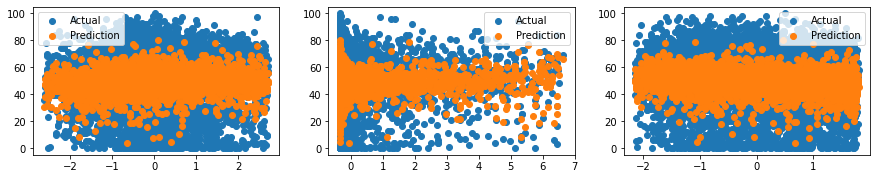



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.15
Residual Sum of Squares (RSS) on Training set  ---> 2593971.59
Mean Squared Error (MSE) on Training set       ---> 362.29
Root Mean Squared Error (RMSE) on Training set ---> 19.03

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> -0.06
Residual Sum of Squares (RSS) on Training set  ---> 793074.13
Mean Squared Error (MSE) on Training set       ---> 443.06
Root Mean Squared Error (RMSE) on Training set ---> 21.05

--------------------Residual Plots--------------------


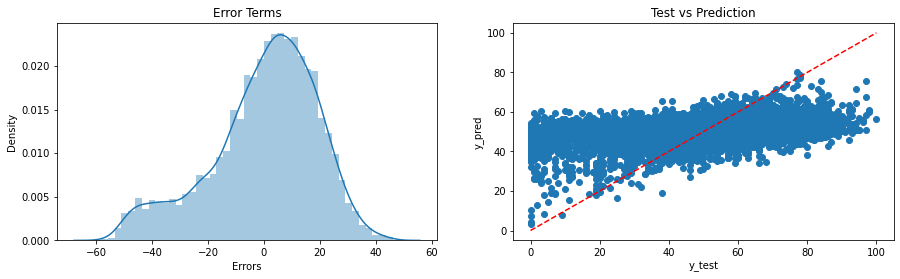

In [46]:
#Using the 4rd Order Polynomial Regression model (degree=3)

poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(Train_X_std)
X_poly1 = poly_reg.fit_transform(Test_X_std)
PR = ElasticNet()
PR.fit(X_poly, Train_Y)

pred1 = PR.predict(X_poly)
pred2 = PR.predict(X_poly1)

print('{}{}\033[1m Evaluating Polynomial Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(4, pred1, pred2)

---

### 6f. Comparing the Evaluation Metics of the Models

In [47]:
# Regression Models Results Evaluation

EMC = Model_Evaluation_Comparison_Matrix.copy()
EMC.index = ['Multiple Linear Regression (MLR)','Ridge Linear Regression (RLR)','Lasso Linear Regression (LLR)','Elastic-Net Regression (ENR)','Polynomial Regression (PNR)']
EMC

Train-R2  Test-R2   Train-RSS   Test-RSS  \
Multiple Linear Regression (MLR)      0.04     0.00  2946919.97  745117.98   
Ridge Linear Regression (RLR)         0.04     0.00  2946919.98  745114.06   
Lasso Linear Regression (LLR)         0.02     0.01  3014406.15  742350.23   
Elastic-Net Regression (ENR)          0.02     0.01  3001964.44  741970.93   
Polynomial Regression (PNR)           0.15    -0.06  2593971.59  793074.13   

                                  Train-MSE  Test-MSE  Train-RMSE  Test-RMSE  
Multiple Linear Regression (MLR)     411.58    416.27       20.29      20.40  
Ridge Linear Regression (RLR)        411.58    416.26       20.29      20.40  
Lasso Linear Regression (LLR)        421.01    414.72       20.52      20.36  
Elastic-Net Regression (ENR)         419.27    414.51       20.48      20.36  
Polynomial Regression (PNR)          362.29    443.06       19.03      21.05

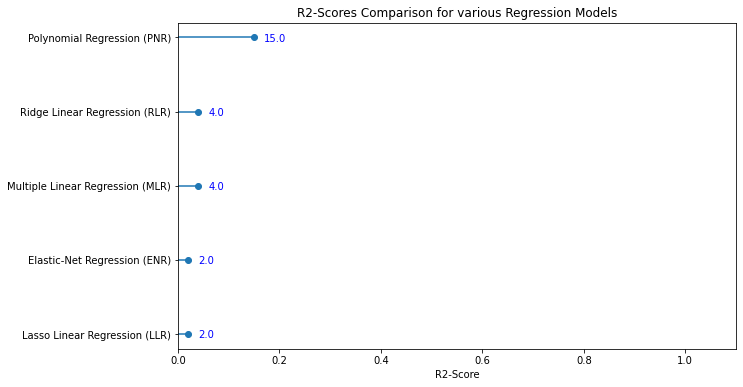

In [48]:
# R2-Scores Comparison for different Regression Models

R2 = EMC['Train-R2'].sort_values(ascending=True)
plt.hlines(y=R2.index, xmin=0, xmax=R2.values)
plt.plot(R2.values, R2.index,'o')
plt.title('R2-Scores Comparison for various Regression Models')
plt.xlabel('R2-Score')
#plt.ylabel('Regression Models')
for i, v in enumerate(R2):
    plt.text(v+0.02, i-0.05, str(v*100), color='blue')
plt.xlim([0,1.1])
plt.show()

**Inference:** From the above plot, it is clear that the polynomial regresion models have the highest explainability power  to understand the dataset.

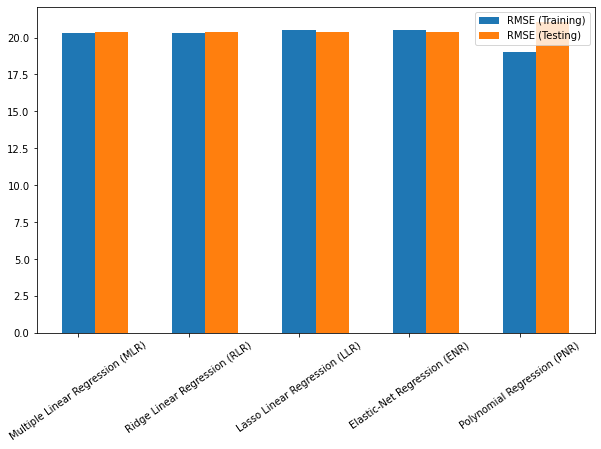

In [49]:
# Root Mean SquaredError Comparison for different Regression Models

cc = Model_Evaluation_Comparison_Matrix.columns.values
s=5

plt.bar(np.arange(s), Model_Evaluation_Comparison_Matrix[cc[-2]].values, width=0.3, label='RMSE (Training)')
plt.bar(np.arange(s)+0.3, Model_Evaluation_Comparison_Matrix[cc[-1]].values, width=0.3, label='RMSE (Testing)')
plt.xticks(np.arange(s),EMC.index, rotation =35)
plt.legend()
plt.show()

**Inference:** The polynomial regression slightly overfits on the data.
For this problem, it is can be said that any simple regression can be a good choice to go with...

---

## <center> 10. Project Outcomes & Conclusions

---

### Here are some of the key outcomes of the project:
- The Dataset was large enough totally just 18835 samples & after preprocessing 52.5% of the datasamples were dropped. 
- Visualising the distribution of data & their relationships, helped us to get some insights on the feature-set.
- The features had high multicollinearity, hence in Feature Extraction step, we skipped as of now as Advanced Regression Alogrithms take care of it.
- Testing multiple algorithms with default hyperparamters gave us some understanding for various models performance on this specific dataset.
- While, Polynomial Regression (Order-2) was slightly overfitting, it is safe to use multiple regression algorithm, as their scores were quiet comparable & also they're more generalisable.

In [ ]:
<<<----------------------------------------------THE END---------------------------------------------------------->>>